In [1]:
library(fpp3)

── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.3
✔ dplyr       1.1.3     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.0     ✔ feasts      0.3.1
✔ lubridate   1.9.3     ✔ fable       0.3.3
✔ ggplot2     3.4.3     ✔ fabletools  0.3.4

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



ARIMA

9.1 -- stationarity and differencing

In [2]:
google_2015 <- gafa_stock |> filter(Symbol == "GOOG", year(Date) == 2015)

In [3]:
head(google_2015)

Symbol,Date,Open,High,Low,Close,Adj_Close,Volume
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GOOG,2015-01-02,526.1147,528.3624,521.2316,521.9377,521.9377,1447600
GOOG,2015-01-05,520.3962,521.4604,510.2520,511.0576,511.0576,2059800
GOOG,2015-01-06,512.1815,513.3500,498.3078,499.2128,499.2128,2899900
GOOG,2015-01-07,504.2252,504.4679,496.9154,498.3575,498.3575,2065100
GOOG,2015-01-08,495.2645,500.7245,488.3128,499.9289,499.9289,3353600
GOOG,2015-01-09,501.9975,502.1566,492.0821,493.4545,493.4545,2069400


In [11]:
options(repr.plot.width = 16, repr.plot.height = 14)

Warning message:
“Provided data has an irregular interval, results should be treated with caution. Computing ACF by observation.”


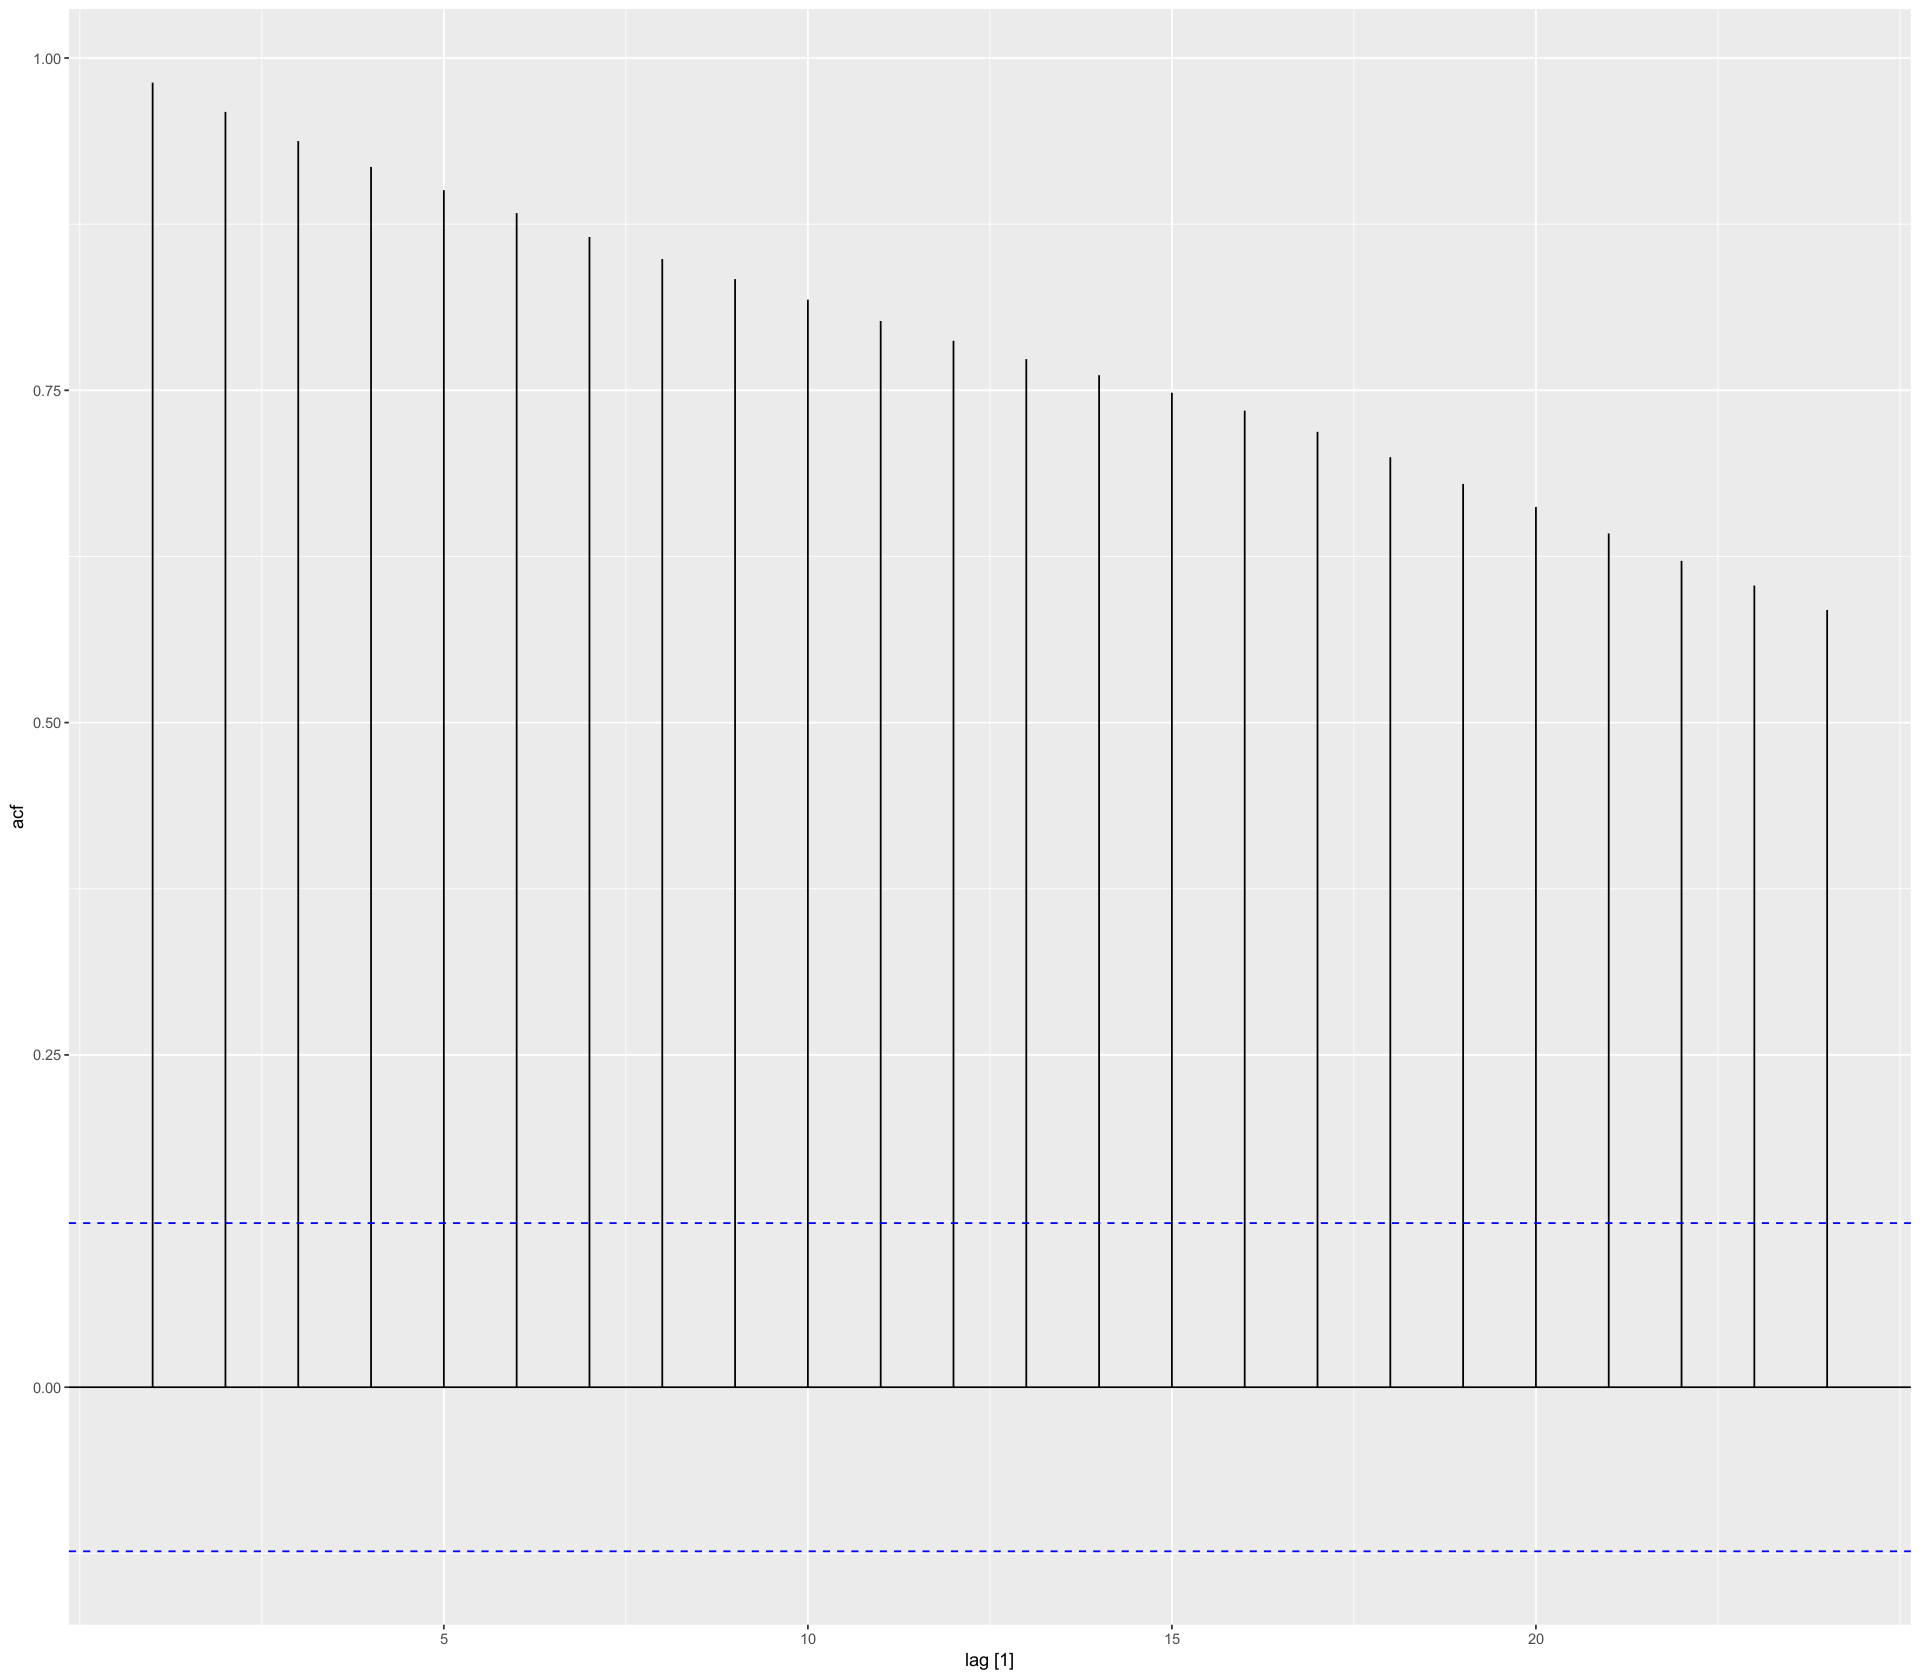

In [12]:
google_2015 |>ACF(Close)|>autoplot()

Warning message:
“Provided data has an irregular interval, results should be treated with caution. Computing ACF by observation.”


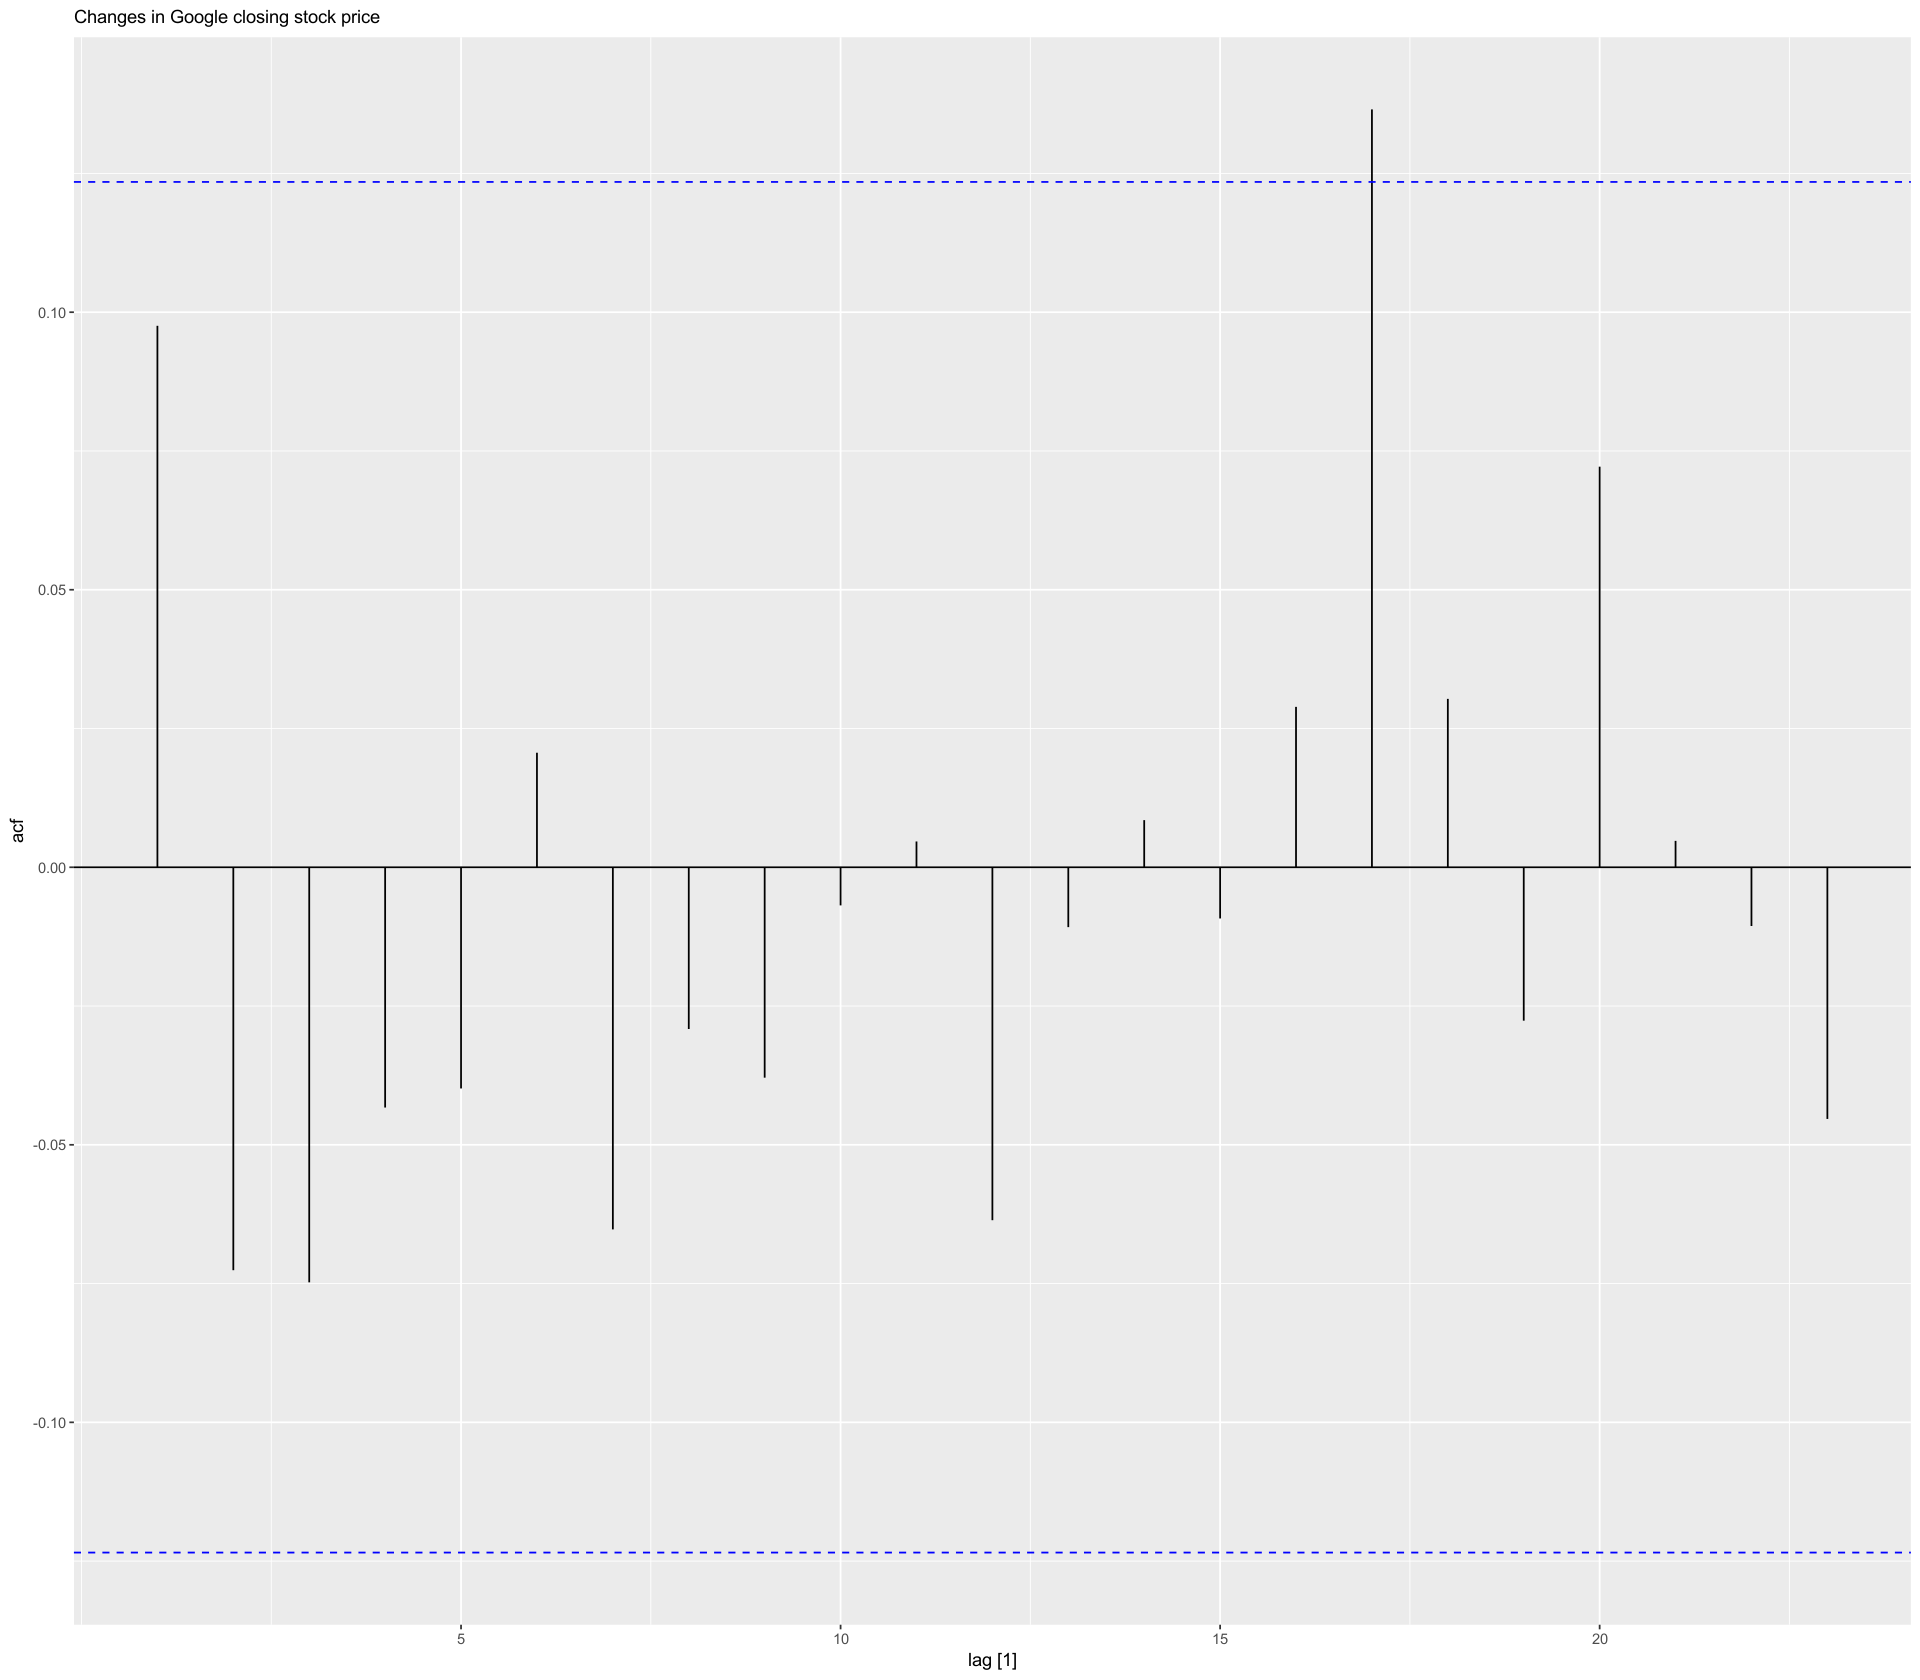

In [13]:
# Now differencing 

google_2015|> ACF(difference(Close)) |> autoplot() + labs(subtitle = "Changes in Google closing stock price")

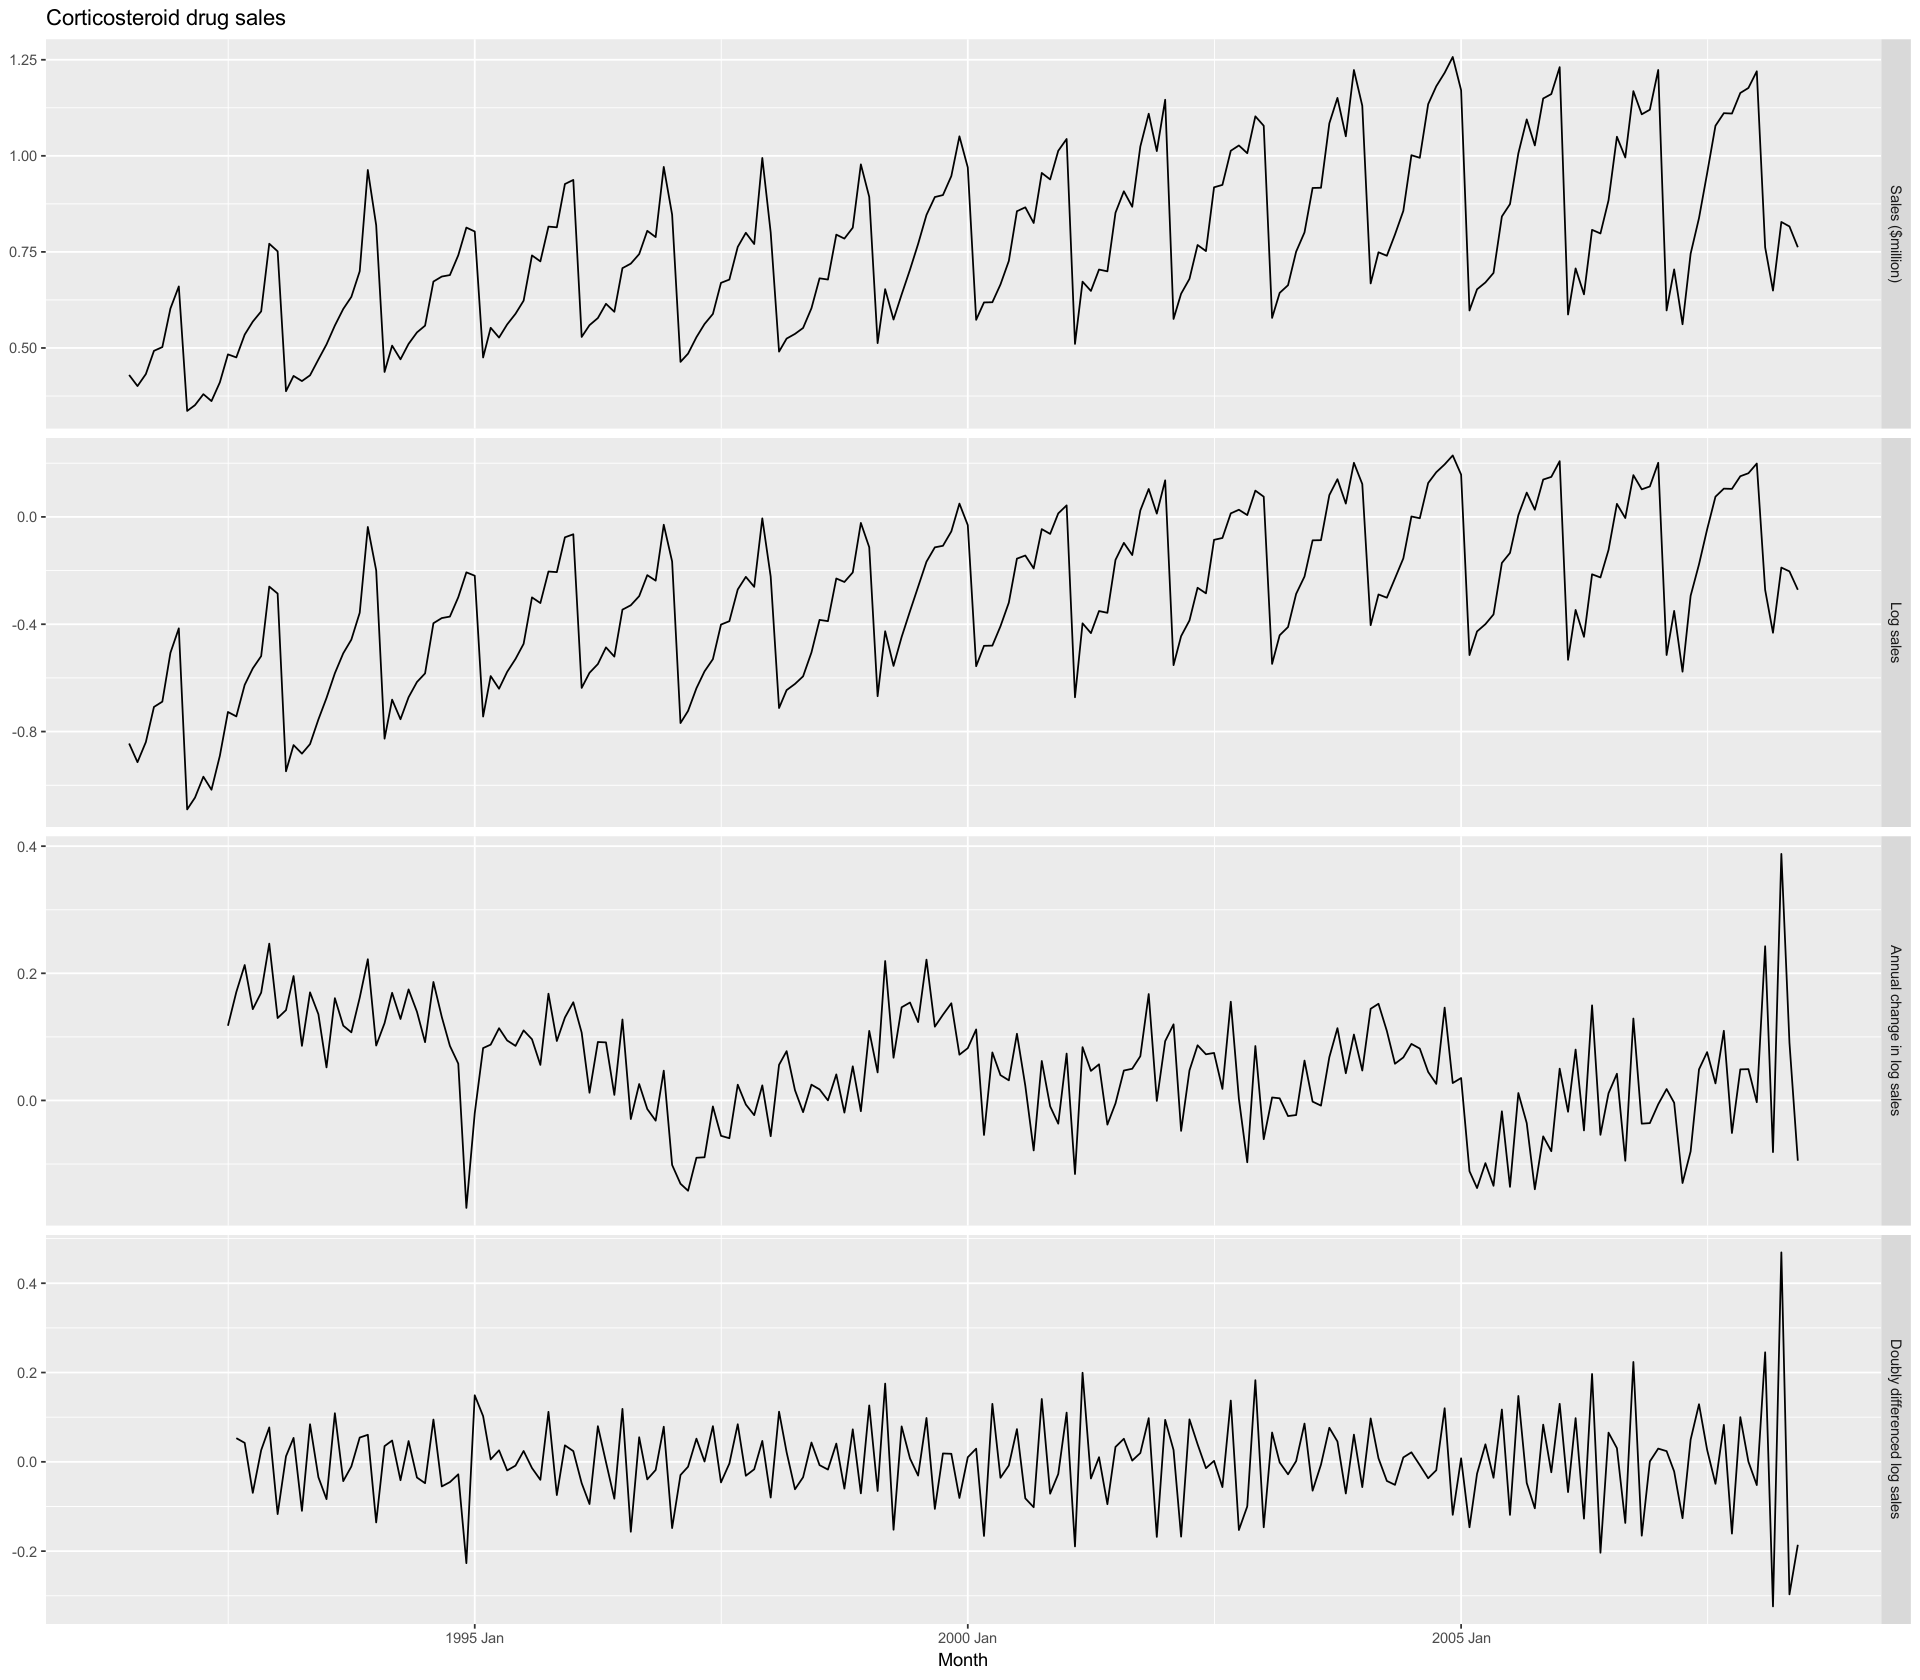

In [16]:
PBS |>
  filter(ATC2 == "H02") |>
  summarise(Cost = sum(Cost)/1e6) |>
  transmute(
    `Sales ($million)` = Cost,
    `Log sales` = log(Cost),
    `Annual change in log sales` = difference(log(Cost), 12),
    `Doubly differenced log sales` =
                     difference(difference(log(Cost), 12), 1)
  ) |>
  pivot_longer(-Month, names_to="Type", values_to="Sales") |>
  mutate(
    Type = factor(Type, levels = c(
      "Sales ($million)",
      "Log sales",
      "Annual change in log sales",
      "Doubly differenced log sales"))
  ) |>
  ggplot(aes(x = Month, y = Sales)) +
  geom_line() +
  facet_grid(vars(Type), scales = "free_y") +
  labs(title = "Corticosteroid drug sales", y = NULL)